In [1]:
from zipfile import ZipFile

dataset_movies= 'movies_metadata.csv.zip'
dataset_ratings= 'ratings.csv.zip'

with ZipFile('movies_metadata.csv.zip', 'r') as zip_object:
    zip_object.extractall()
with ZipFile('ratings.csv.zip', 'r') as zip_object:
    zip_object.extractall()

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
from ast import literal_eval
import seaborn as sns
import ast
from transformers import pipeline
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer

In [3]:
df_movies=pd.read_csv("movies_metadata.csv")
print(df_movies.shape)
df_ratings=pd.read_csv("ratings.csv")
print(df_ratings.shape)

/var/folders/8j/3c5nkmms65398wvv134fk5l80000gn/T/ipykernel_10639/178857410.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies=pd.read_csv("movies_metadata.csv")


(45466, 24)
(26024289, 4)


In [67]:
df_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   id         float64
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(2), int64(2)
memory usage: 794.2 MB


rating
4.0    6998802
3.0    5256722
5.0    3812499
3.5    3116213
4.5    2170441
2.0    1762440
2.5    1255358
1.0     843310
0.5     404897
1.5     403607
Name: count, dtype: int64


/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='rating', ylabel='count'>

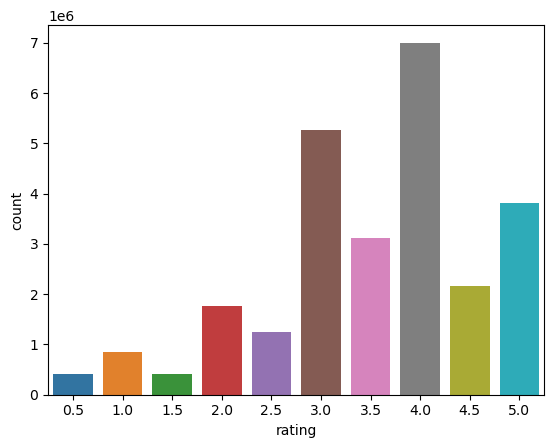

In [5]:
#visualizing movie ratings

ratings_count=df_ratings.rating.value_counts()
index_ratings=ratings_count.index
print(ratings_count)
sns.barplot(x=index_ratings, y=ratings_count)

In [43]:

df_movie_english=pd.DataFrame()
df_movie_english= df_movies[(df_movies['vote_count']>=10)& (df_movies['vote_average'].notnull()) & (df_movies['original_language']=='en') ]

df_movie_english=df_movie_english[['id','title', 'vote_count', 'vote_average','genres']]

df_movie_english['year'] = pd.to_datetime(df_movies['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df_movie_english['year'] = pd.to_datetime(df_movie_english['year'])
df_movie_english['year']= df_movie_english['year'].astype('int64')
df_movie_english['year']= df_movie_english['year'].astype('float64')


# df_movie_english['tagline']=df_movie_english['tagline'].astype('string')
df_movie_english['id']=df_movie_english['id'].astype('float64')
def extract_genres(genres_str):
    try:
        genres_list = ast.literal_eval(genres_str)
        return [genre['name'] for genre in genres_list]
    except (SyntaxError, ValueError):
        return None
    
df_movie_english["genres"]= df_movie_english["genres"].apply(extract_genres)

# def extract_emotion(text):
#     try:
#         return te.get_emotion(text)
#     except (SyntaxError, ValueError):
#         return None

#df_movie_english["tagline"]= df_movie_english["tagline"].apply(extract_emotion)
# print(df_movie_english["tagline"].to_string())
df_movie_english.info(), df_ratings.info()




<class 'pandas.core.frame.DataFrame'>
Index: 16752 entries, 0 to 45460
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            16752 non-null  float64
 1   title         16752 non-null  object 
 2   vote_count    16752 non-null  float64
 3   vote_average  16752 non-null  float64
 4   genres        16752 non-null  object 
 5   year          16752 non-null  float64
dtypes: float64(4), object(2)
memory usage: 916.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   id         float64
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(2), int64(2)
memory usage: 794.2 MB


(None, None)

In [7]:
# df_movie_english['tagline']=df_movie_english['tagline']
# # Load the sentiment analysis pipeline
# sentiment_analysis = pipeline("sentiment-analysis")

# def analyze_movie_tagline(tagline):
#     # Use the sentiment analysis pipeline on the tagline
#     result = sentiment_analysis(tagline)
    
#     # The result is a list of dictionaries with 'label' and 'score' keys
#     label = result[0]['label']
#     if label == "NEGATIVE"  :
#         movie_type= 'sad ending'
#     else:
#         movie_type= 'happy ending'
#     return movie_type

# #df_movie_english['sentiment']=df_movie_english['tagline'].apply(analyze_movie_tagline)
# analyze_movie_tagline("i feel okay")


In [51]:
df_ratings=df_ratings.dropna()
df_ratings.rename(columns={'movieId':'id'},inplace=True)
df_ratings['id']= df_ratings['id'].astype('float64')
df_rating_1=pd.DataFrame()
df_rating_1= df_ratings[['id', 'rating']]

#df_rating_1['id']= df_rating_1['id'].drop_duplicates()

df_final= pd.DataFrame()
df_final=pd.merge(df_movie_english,df_rating_1, on= 'id', how='inner')
# df_final=df_final.groupby('title')



#converting all the values to either string or float64

df_final['title']=df_final['title'].astype('string')
df_final['genres']=df_final['genres'].astype('string')
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7687847 entries, 0 to 7687846
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            float64
 1   title         string 
 2   vote_count    float64
 3   vote_average  float64
 4   genres        string 
 5   year          float64
 6   rating        float64
dtypes: float64(5), string(2)
memory usage: 410.6 MB


In [52]:
df_movies_shuffled = df_final.sample(frac=1, random_state=42).reset_index(drop=True)

In [53]:
train_df, test_and_val_df = train_test_split(df_movies_shuffled, test_size=0.4, random_state=42)
test_df, val_df = train_test_split(test_and_val_df, test_size=0.5, random_state=42)


In [54]:

features = ['vote_count', 'vote_average', 'rating', 'year']


In [55]:
mlb = MultiLabelBinarizer()
genre_encoded = mlb.fit_transform(df_movies_shuffled['genres'])
genre_columns = ['genre_' + genre for genre in mlb.classes_]
df_genres = pd.DataFrame(genre_encoded, columns=genre_columns)

In [56]:
X_train = pd.concat([train_df[features], df_genres.iloc[train_df.index]], axis=1)
X_test = pd.concat([test_df[features], df_genres.iloc[test_df.index]], axis=1)
X_val = pd.concat([val_df[features], df_genres.iloc[val_df.index]], axis=1)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)


/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/sklearn/utils/validation.py

In [58]:
kmeans = KMeans(n_clusters=5, random_state=42)
train_clusters = kmeans.fit_predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)
val_clusters = kmeans.predict(X_val_scaled)

/Users/rakshekarajakumar/anaconda3/envs/ee541_hw/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
train_df['cluster'] = train_clusters
test_df['cluster'] = test_clusters
val_df['cluster'] = val_clusters

print(val_df)

             id                        title  vote_count  vote_average  \
4997379  5205.0                 Pumping Iron       136.0           7.0   
6119790  1968.0                Fools Rush In       133.0           5.8   
7473002  3981.0              What Women Want      1021.0           6.1   
3967123   231.0                      Syriana       455.0           6.3   
2154138   541.0  The Man with the Golden Arm        51.0           6.9   
...         ...                          ...         ...           ...   
4872281  8984.0                   Disclosure       217.0           5.9   
3298402  2028.0              Say Anything...       244.0           7.2   
6765373   931.0               Don't Look Now       197.0           7.1   
1435750  1411.0                  The Rapture        15.0           6.4   
1554458   858.0         Sleepless in Seattle       630.0           6.5   

                                                    genres          year  \
4997379                            

In [70]:
def recommend_movies(movie_id, df):
    cluster_label = df[df['id'] == movie_id]['cluster'].values[0]
    recommendations = df[df['cluster'] == cluster_label]['title'].unique()
    return recommendations[:5]

movie_id_to_recommend = val_df['id'].iloc[0]
recommendations = recommend_movies(movie_id_to_recommend, val_df)
print(f"Recommendations for Movie ID {movie_id_to_recommend}:", recommendations)


Recommendations for Movie ID 5205.0: <StringArray>
[      'Pumping Iron',              'Klute', 'Once Were Warriors',
 'The Great Dictator',          'The Hours']
Length: 5, dtype: string


In [75]:
def recommend_movies_by_title(title, df):
    # Check if 'cluster' column exists in the DataFrame
    if 'cluster' not in df.columns:
        raise ValueError("The 'cluster' column does not exist in the DataFrame.")

    # Extract movie ID for the specified movie title
    try:
        movie_id = df[df['title'] == title]['id'].values[0]
    except IndexError:
        raise ValueError(f"No movie found with title '{title}' in the DataFrame.")

    # Extract cluster label for the specified movie ID
    cluster_label = df[df['id'] == movie_id]['cluster'].values[0]

    # Get recommendations based on cluster label
    recommendations = df[df['cluster'] == cluster_label]['title'].unique()

    return recommendations

# Example: Recommend movies for a specific movie title entered by the user
user_input_title = input("Enter a movie title: ")

try:
    recommendations = recommend_movies_by_title(user_input_title, val_df)
    print(f"Recommendations for Movie Title '{user_input_title}':", recommendations)
except ValueError as e:
    print(e)


Recommendations for Movie Title 'Jumanji': <StringArray>
[                                'Krull',
                'The Poseidon Adventure',
                           'Hard Target',
                 'The Forbidden Kingdom',
                       'Men in Black II',
                  'The Astronaut Farmer',
                 '2001: A Space Odyssey',
                           'Bad Boys II',
                'The Day After Tomorrow',
                      "Charlie's Angels",
 ...
                          'Tomorrowland',
                           'All Is Lost',
          'Marley & Me: The Puppy Years',
                                  'Tabu',
  'The Young and Prodigious T.S. Spivet',
           'The Gamers: Dorkness Rising',
 'The Hunger Games: Mockingjay - Part 2',
       'The Hunger Games: Catching Fire',
                    '30 Minutes or Less',
        'Battlestar Galactica: The Plan']
Length: 425, dtype: string
